In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Tutorial on Neural Network Optimisations for Neural Networks & Deep Learning
## Spring 2025
Prepared by Ishan Kumar (ik2592)

# Function

In [ ]:
def L(x):
    return (x**2 - 4) ** 2 + 3 * x


def L_grad(x):  # Gradient of the loss function
    return 4 * x * (x**2 - 4) + 3

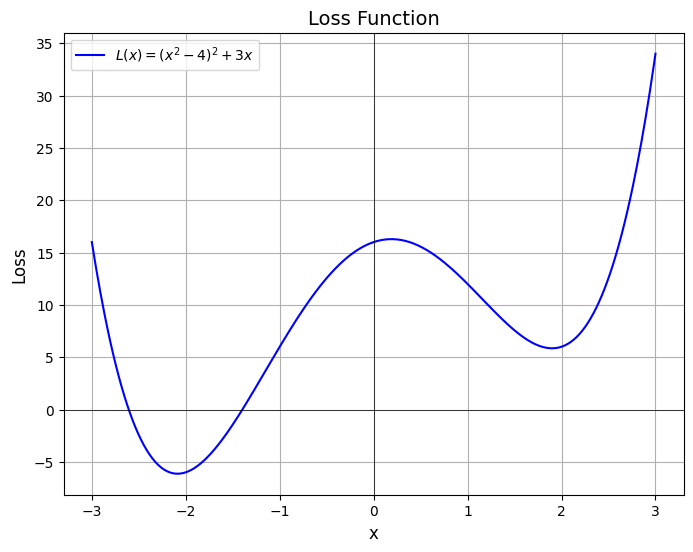

In [ ]:
x_values = np.linspace(-3, 3, 400)
y_values = L(x_values)

# Plot the loss function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r"$L(x) = (x^2 - 4)^2 + 3x$", color="b")
plt.title("Loss Function", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.show()

# Random Search

In [ ]:
best_loss = float("inf")
best_x = None

for num in range(10):
    x = np.random.randn()
    loss = L(x)  # Compute loss
    if loss < best_loss:  # Keep track of the best solution
        best_loss = loss
        best_x = x
    print(f"Attempt {num}: loss={loss:.6f}, best_loss={best_loss:.6f}")

print(f"Best x found: {best_x}, Best loss: {best_loss}")

Attempt 0: loss=15.847945, best_loss=15.847945
Attempt 1: loss=4.176456, best_loss=4.176456
Attempt 2: loss=13.073341, best_loss=4.176456
Attempt 3: loss=13.142501, best_loss=4.176456
Attempt 4: loss=16.073062, best_loss=4.176456
Attempt 5: loss=12.924939, best_loss=4.176456
Attempt 6: loss=12.715130, best_loss=4.176456
Attempt 7: loss=9.878377, best_loss=4.176456
Attempt 8: loss=8.465088, best_loss=4.176456
Attempt 9: loss=7.236781, best_loss=4.176456
Best x found: -1.120121755427993, Best loss: 4.176456459873402


# Random Search ++

In [ ]:
best_loss = float("inf")
best_x = None
x = np.random.randn()

for num in range(10):
    step_size = 0.1  # Small step size for perturbation
    x_try = x + np.random.randn() * step_size  # Random perturbation
    loss = L(x_try)  # Compute loss
    if loss < best_loss:  # Keep track of the best solution
        best_loss = loss
        best_x = x_try
        x = x_try

    print(f"Attempt {num}: loss={loss:.6f}, best_loss={best_loss:.6f}")

print(f"Best x found: {best_x}, Best loss: {best_loss}")

Attempt 0: loss=0.145630, best_loss=0.145630
Attempt 1: loss=-0.758594, best_loss=-0.758594
Attempt 2: loss=-0.528981, best_loss=-0.758594
Attempt 3: loss=-0.136845, best_loss=-0.758594
Attempt 4: loss=0.651049, best_loss=-0.758594
Attempt 5: loss=-1.771749, best_loss=-1.771749
Attempt 6: loss=-2.379911, best_loss=-2.379911
Attempt 7: loss=-2.289579, best_loss=-2.379911
Attempt 8: loss=-2.080090, best_loss=-2.379911
Attempt 9: loss=-3.418188, best_loss=-3.418188
Best x found: -1.658821873157394, Best loss: -3.4181877805124907


# Gradient Descent function


In [ ]:
def gd(lr, f_grad):
    x = 3
    results = [x]
    for i in range(10):
        x -= lr * f_grad(x)
        results.append(float(x))
    print(f"epoch 10, x: {x:f}")
    return results


def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = np.arange(-n, n, 0.01)
    plt.figure(figsize=(6, 4))
    plt.plot(f_line, [f(x) for x in f_line], "-", label="f(x)")
    plt.plot(
        results,
        [f(x) for x in results],
        "o-",
        color="orange",
        label="Gradient Descent Path",
    )
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()
    plt.show()

# Low Learning rate

epoch 10, x: 2.319672


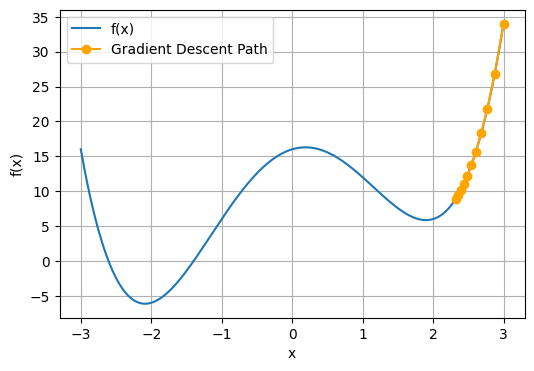

In [ ]:
results = gd(0.002, L_grad)
show_trace(results, L)

# High Learning Rate

epoch 10, x: -1.061304


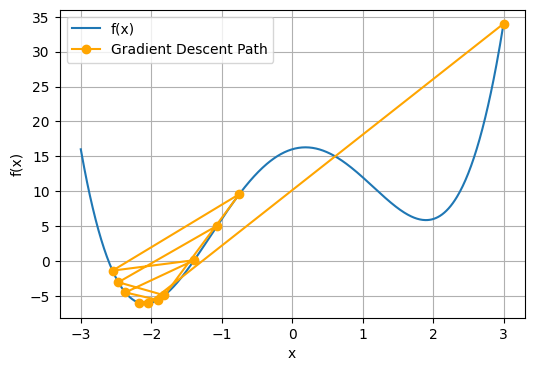

In [ ]:
results = gd(0.08, L_grad)
show_trace(results, L)

# Ideal Learning Rate


epoch 10, x: -2.088253


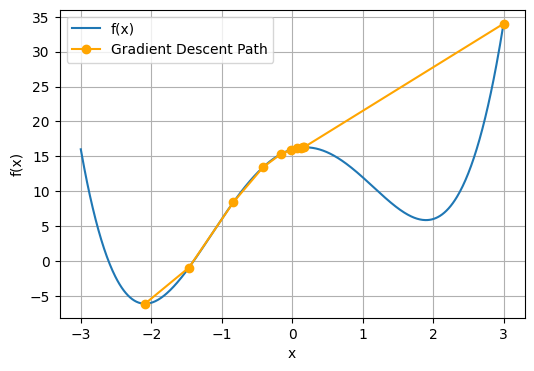

In [ ]:
results = gd(0.045, L_grad)
show_trace(results, L)

### Exercise - Try out the LR changes with different functions by changing the L, L_grad functions

# PyTorch and different Optimisation Functions


## Resources for PyTorch
1. Installation - https://pytorch.org/get-started/locally/ (Colab should have PyTorch ready but if you want to run locally)
2. Getting started with PyTorch - https://pytorch.org/tutorials/

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset, random_split

#Model

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

#Dataset

In [ ]:
class MNISTSubset(Dataset):
    def __init__(self, train=True):
        transform = transforms.Compose(
            [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
        )
        full_dataset = datasets.MNIST(
            root="./data", train=train, transform=transform, download=True
        )
        self.dataset, _ = random_split(full_dataset, [1000, len(full_dataset) - 1000])

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

#Train Loop

In [ ]:
def train_model(optimiser, model, train_loader, criterion, epochs=5):
    optimizer = optimiser
    # model.to(device)
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            # images, labels = images.to(device), labels.to(device)  # Move data to GPU
            # Clear the gradients
            optimizer.zero_grad()
            # Forward Pass
            outputs = model(images)
            # Loss
            loss = criterion(outputs, labels)
            # Backprop
            loss.backward()
            # Optimiser step
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

In [ ]:
def evaluate_model(model, val_loader, criterion):
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Compute accuracy (assuming classification task)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(val_loader)
    accuracy = 100 * correct / total  # Convert to percentage

    print(f"Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return avg_loss, accuracy

In [ ]:
train_dataset = MNISTSubset(train=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 9.91M/9.91M [00:01<00:00, 5.27MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 4.54k/4.54k [00:00<00:00, 2.83MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



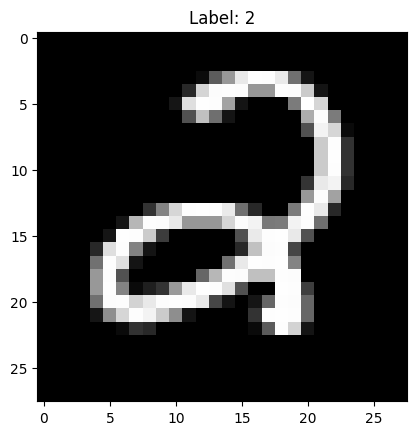

In [ ]:
# Plot an example input
example_img, example_label = train_dataset[0]
plt.imshow(example_img.squeeze(), cmap="gray")
plt.title(f"Label: {example_label}")
plt.show()

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
criterion = nn.CrossEntropyLoss()

In [ ]:
model = SimpleNN()
optimiser = optim.SGD(model.parameters(), lr=0.01)
print("Using SGD and LR = 0.01")
train_model(optimiser, model, train_loader, criterion)

Using SGD and LR = 0.01
Epoch 1/5, Loss: 2.2361
Epoch 2/5, Loss: 1.9583
Epoch 3/5, Loss: 1.6993
Epoch 4/5, Loss: 1.4469
Epoch 5/5, Loss: 1.2327


In [ ]:
model = SimpleNN()
optimiser = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print("Using SGD+Momentum and LR = 0.01")
train_model(optimiser, model, train_loader, criterion)

Using SGD+Momentum and LR = 0.01
Epoch 1/5, Loss: 1.9238
Epoch 2/5, Loss: 0.8038
Epoch 3/5, Loss: 0.4526
Epoch 4/5, Loss: 0.3539
Epoch 5/5, Loss: 0.3009


In [ ]:
model = SimpleNN()
optimiser = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
print("Using SGD+Nesterov Momentum and LR = 0.01")
train_model(optimiser, model, train_loader, criterion)

Using SGD+Nesterov Momentum and LR = 0.01
Epoch 1/5, Loss: 1.8278
Epoch 2/5, Loss: 0.7492
Epoch 3/5, Loss: 0.4509
Epoch 4/5, Loss: 0.3418
Epoch 5/5, Loss: 0.2744


In [ ]:
model = SimpleNN()
optimiser = optim.Adagrad(model.parameters(), lr=0.01)
print("Using Adagrad and LR = 0.01")
train_model(optimiser, model, train_loader, criterion)

Using Adagrad and LR = 0.01
Epoch 1/5, Loss: 1.2794
Epoch 2/5, Loss: 0.4798
Epoch 3/5, Loss: 0.3372
Epoch 4/5, Loss: 0.2726
Epoch 5/5, Loss: 0.2277


In [ ]:
model = SimpleNN()
optimiser = optim.Adam(model.parameters(), lr=0.01)
print("Using Adam and LR = 0.01")
train_model(optimiser, model, train_loader, criterion)

Using Adam and LR = 0.01
Epoch 1/5, Loss: 1.2276
Epoch 2/5, Loss: 0.4192
Epoch 3/5, Loss: 0.2594
Epoch 4/5, Loss: 0.1483
Epoch 5/5, Loss: 0.0934


## Exercise
1. Try out the performance of all these optimiser on a NN with Sigmoid instead of ReLU, are the results the same?
2. Try to run the code on GPU instead of CPU and notice the difference in execution time.


# Learning Rate Schedulers

In [ ]:
def train_model(optimiser, model, train_loader, criterion, epochs=5, scheduler=None):
    optimizer = optimiser

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if scheduler != None:
            scheduler.step()
        print(
            f"Epoch {epoch+1}/{epochs}, LR: {optimiser.param_groups[0]['lr']:.6f} Loss: {total_loss/len(train_loader):.4f}"
        )

In [ ]:
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR, CyclicLR

In [ ]:
model = SimpleNN()
optimiser = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimiser, gamma=0.95, step_size=5)
print("Using StepLR Decay with Adam (LR = 0.01, Gamma = 0.95)")
train_model(optimiser, model, train_loader, criterion, epochs=10, scheduler=scheduler)

Using StepLR Decay with Adam (LR = 0.01, Gamma = 0.95)
Epoch 1/10, LR: 0.010000 Loss: 1.2302
Epoch 2/10, LR: 0.010000 Loss: 0.4297
Epoch 3/10, LR: 0.010000 Loss: 0.2259
Epoch 4/10, LR: 0.010000 Loss: 0.1284
Epoch 5/10, LR: 0.009500 Loss: 0.0690
Epoch 6/10, LR: 0.009500 Loss: 0.0729
Epoch 7/10, LR: 0.009500 Loss: 0.0600
Epoch 8/10, LR: 0.009500 Loss: 0.0415
Epoch 9/10, LR: 0.009500 Loss: 0.0153
Epoch 10/10, LR: 0.009025 Loss: 0.0074


In [ ]:
model = SimpleNN()
optimiser = optim.Adam(model.parameters(), lr=0.01)
scheduler = ExponentialLR(optimiser, gamma=0.95)
print("Using Exponential Decay with Adam (LR = 0.01, Gamma = 0.95)")
train_model(optimiser, model, train_loader, criterion, epochs=10, scheduler=scheduler)

In [ ]:
model = SimpleNN()
optimiser = optim.Adam(model.parameters(), lr=0.01)
scheduler = CosineAnnealingLR(optimiser, T_max=50, eta_min=0.0001)
print("Using CosineAnnealing Decay with Adam (LR = 0.01, Gamma = 0.95)")
train_model(optimiser, model, train_loader, criterion, epochs=10, scheduler=scheduler)

In [ ]:
model = SimpleNN()
optimiser = optim.Adam(model.parameters(), lr=0.01)
scheduler = CyclicLR(
    optimiser, base_lr=0.001, max_lr=0.01, step_size_up=5, mode="triangular2"
)
print("Using CyclicLR decay with Adam (LR = 0.01, Gamma = 0.95)")
train_model(optimiser, model, train_loader, criterion, epochs=10, scheduler=scheduler)

# Weight initialisation

In [ ]:
# Apply He initialization (good for ReLU)
for layer in model.modules():
    if isinstance(layer, nn.Linear):
        nn.init.kaiming_normal_(layer.weight, nonlinearity="relu")
        nn.init.zeros_(layer.bias)  # Bias to 0

## Exercise
1. Try training the Neural network with different initialisations mentioned in the slides and note the difference in final performance
2. Try out with extremely large weight initialisation and extremely small weights.